In [55]:
import urllib.request, json 
with urllib.request.urlopen("https://pomber.github.io/covid19/timeseries.json") as url:
    data = json.loads(url.read().decode())['Poland']
    
while data[0]['confirmed'] == 0: del data[0]
    
import numpy as np
infected = []
deaths = []
for i in data:
    i['infected'] = i['confirmed'] - i['recovered'] - i['deaths']
    del i['recovered']
    del i['confirmed']
    print(i)
    infected.append(i['infected'])
    deaths.append(i['deaths'])
    
infected = np.array(infected)
deaths = np.array(deaths)

{'date': '2020-3-4', 'deaths': 0, 'infected': 1}
{'date': '2020-3-5', 'deaths': 0, 'infected': 1}
{'date': '2020-3-6', 'deaths': 0, 'infected': 5}
{'date': '2020-3-7', 'deaths': 0, 'infected': 5}
{'date': '2020-3-8', 'deaths': 0, 'infected': 11}
{'date': '2020-3-9', 'deaths': 0, 'infected': 16}
{'date': '2020-3-10', 'deaths': 0, 'infected': 22}
{'date': '2020-3-11', 'deaths': 0, 'infected': 31}
{'date': '2020-3-12', 'deaths': 1, 'infected': 48}
{'date': '2020-3-13', 'deaths': 2, 'infected': 66}
{'date': '2020-3-14', 'deaths': 3, 'infected': 100}
{'date': '2020-3-15', 'deaths': 3, 'infected': 116}
{'date': '2020-3-16', 'deaths': 4, 'infected': 160}
{'date': '2020-3-17', 'deaths': 5, 'infected': 220}
{'date': '2020-3-18', 'deaths': 5, 'infected': 233}
{'date': '2020-3-19', 'deaths': 5, 'infected': 349}
{'date': '2020-3-20', 'deaths': 5, 'infected': 419}
{'date': '2020-3-21', 'deaths': 5, 'infected': 530}
{'date': '2020-3-22', 'deaths': 7, 'infected': 626}
{'date': '2020-3-23', 'deaths': 

In [181]:
"""
a - recorvery rate
b - infection rate

S_0 - number of healthy pepoles (population size - I_0 - R_0)
I_0 - infected peoples
R_0 - recorveded peoples (let's assume that recorvered ones gain virus resistance)

n - number of simulation steps
"""

def modelKermackMcKendrick(a, b, S_0, I_0, R_0, n):
    s = [S_0]
    i = [I_0]
    r = [R_0]
    for j in range(1, n):
        s.append(s[j - 1] - b * i[j - 1] * s[j - 1])
        i.append(i[j - 1] + b * i[j - 1] * s[j - 1] - a * i[j - 1])
        r.append(r[j - 1] + a * i[j - 1])
        b = b * infection_rate_decay
    return np.array(i)



$\frac{1}{a}$ - average length of period when infected person is able to infect others. 

Let's say it's aproximetly equal to the incubation period length. 

Incubation rate from https://www.worldometers.info/coronavirus/coronavirus-incubation-period/


In [184]:
def predict(infected, b, n = 100):
    a = 1 / 5.2 # used average incubation time
    population_size = 38 * 10 ** 6 # poland population size
    I_0 = infected
    R_0 = 0
    S_0 = population_size - I_0 - R_0
    
    return modelKermackMcKendrick(a, b, S_0, I_0, R_0, n)

def predict_now(b):
    return predict(data[-1]['infected'], b)

def predict_from_first_case(b, n=len(infected)):
    return predict(1, b, n)

In [174]:
predict_from_first_case(1e-9)

array([1.00000000e+00, 7.04666666e-01, 4.96555110e-01, 3.49905833e-01,
       2.46566977e-01, 1.73747529e-01, 1.22434092e-01, 8.62752235e-02,
       6.07952741e-02, 4.28404031e-02, 3.01882040e-02, 2.12726210e-02,
       1.49901069e-02, 1.05630287e-02, 7.44341419e-03, 5.24512586e-03,
       3.69606535e-03, 2.60449404e-03, 1.83530013e-03, 1.29327483e-03,
       9.11327659e-04, 6.42182223e-04, 4.52524406e-04, 3.18878864e-04,
       2.24703306e-04])

Let's find b using avaiable data

In [175]:
from scipy.optimize import leastsq

res = leastsq(lambda x: (predict_from_first_case(x) - infected), 0)
print(res)
b = res[0][0]

(array([1.8548375e-08]), 1)


In [176]:
result = predict_now(b)

In [209]:
from datetime import datetime, timedelta

today_date = datetime.strptime(data[-1]['date'], '%Y-%m-%d').date()

max_cases = int(predict_now(b).argmax())
print('day with maximal number of cases', str(today_date + timedelta(days=max_cases)))


day with maximal number of cases 2020-04-23


In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13, 7)

def show(result, scale = 'linear'):
    
    plt.axes(yscale=scale)    
    plt.plot(range(len(infected)), infected)
    plt.plot([i + len(infected) - 1 for i in range(len(result))], result)

    plt.show()

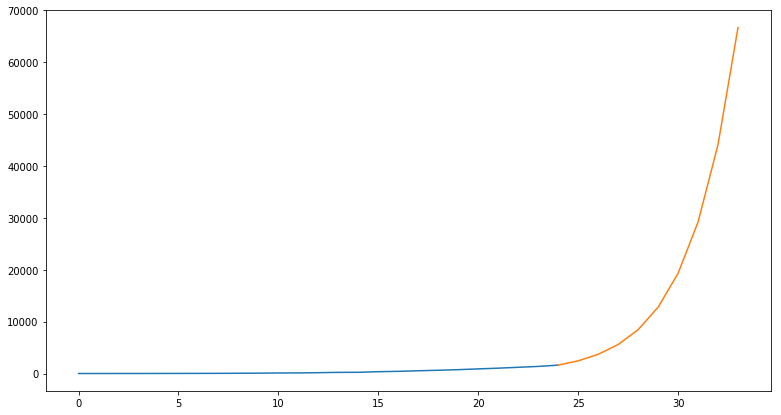

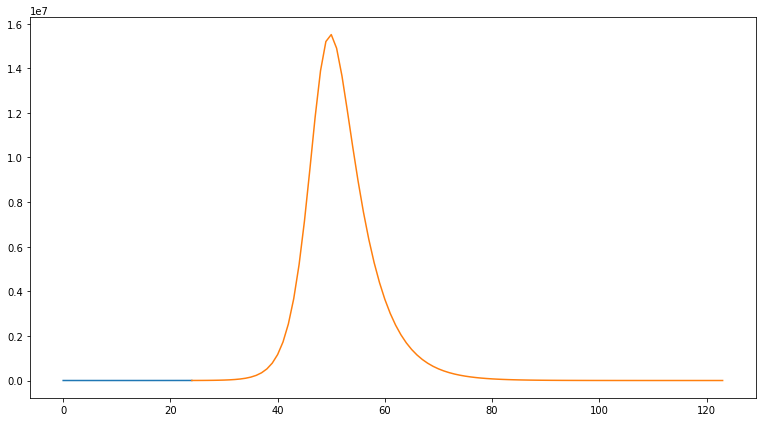

In [211]:
show(predict_now(b)[:10])
show(predict_now(b))

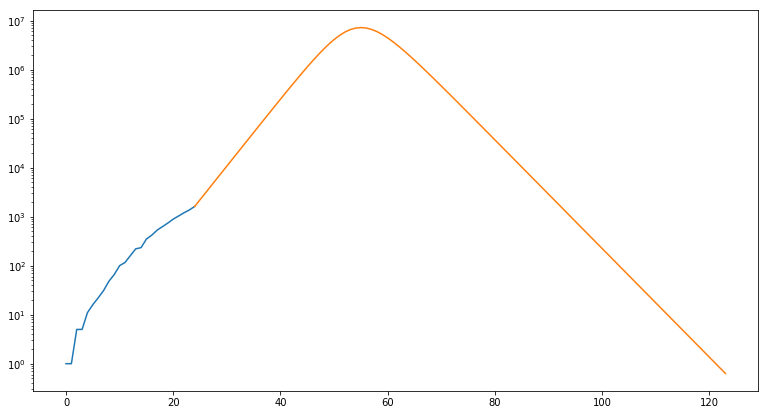

In [180]:
show(predict_now(b), 'log')